# Техническое

Встроенные изображения от Pillow сравнительно тяжелые, а Github любит
лёгкие. Лично мне, способы оптимизации для Pillow неизвестны, так что
компактных встроенных изображения печатаем Matplotlib-ом.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%config InlineBackend.print_figure_kwargs = {'pil_kwargs': {'optimize': True}}
%config InlineBackend.figure_formats = [ "jpeg" ]  # Режем для 
mpl.rcParams['figure.dpi'] = 150

def gray_inline(img):
    fig, ax = plt.subplots()
    ax.imshow(img, cmap='gray')
    plt.show()

def rgb_inline(img):
    fig, ax = plt.subplots()
    ax.imshow(img)
    plt.show()

In [2]:
from collections import namedtuple
import numpy as np
from PIL import Image, ImageOps

# Героический партизан

В оригинале, был в "оттенках от чёрного до белого".

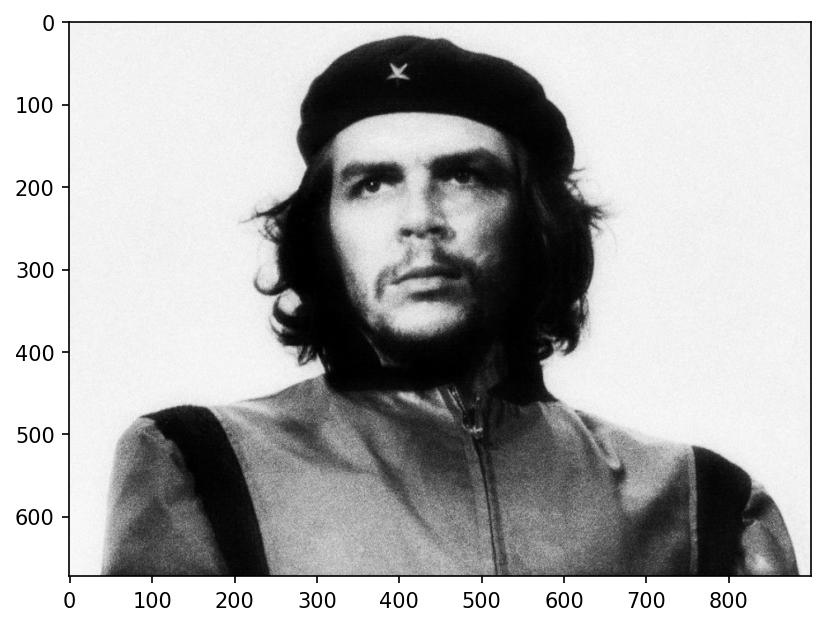

In [3]:
che = ImageOps.grayscale(Image.open("Guerrillero Heroico.jpg"))
gray_inline(che)

## Фиолетово-розовый (RGB)

Если во главу угла поставить "от фиолетового до розового".

In [4]:
violet = np.array((105, 0, 198))
pink = np.array((255, 192, 203))

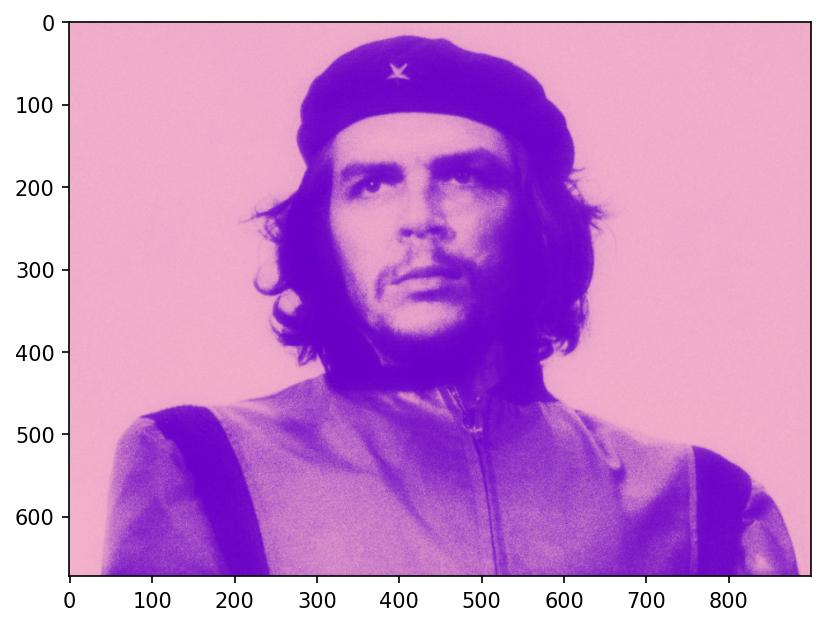

In [5]:
grey = np.asarray(che)
vpche = Image.fromarray(np.uint8(
            violet + np.einsum('ij,k', grey,
                               (pink - violet) / np.iinfo(grey[0, 0]).max)
            ))
rgb_inline(vpche)

## Градации фиолетового

Но, возможно. имелось ввиду так?

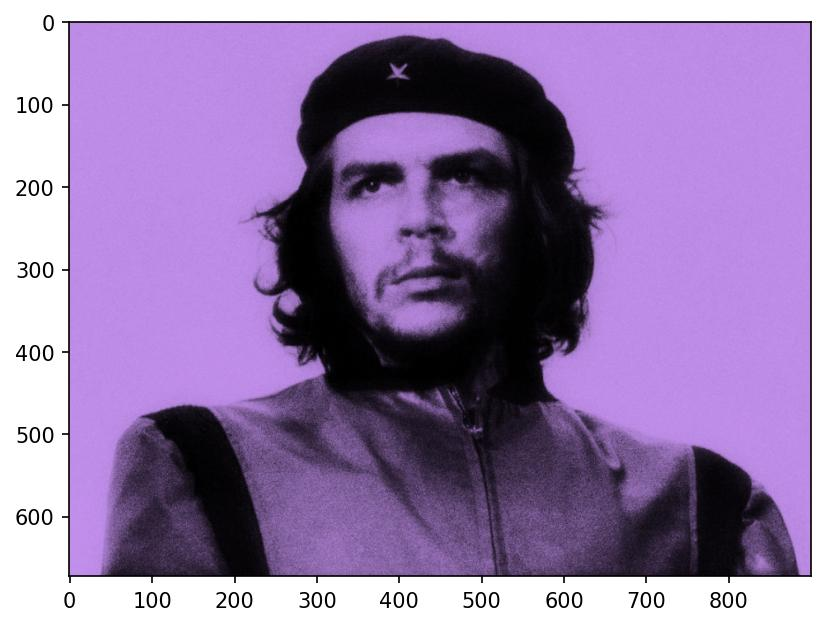

In [6]:
hsv = namedtuple('hsv', 'H S V')
hsv_violet = hsv(272., 100., 78.)

vche = Image.merge('HSV', (
            Image.fromarray(np.full(che.size[::-1], hsv_violet.H*256/360, np.uint8)),
            Image.fromarray(np.full(che.size[::-1], hsv_violet.S, np.uint8)),
            che
        )).convert('RGB')
rgb_inline(vche)

## Градации розового

Или так?

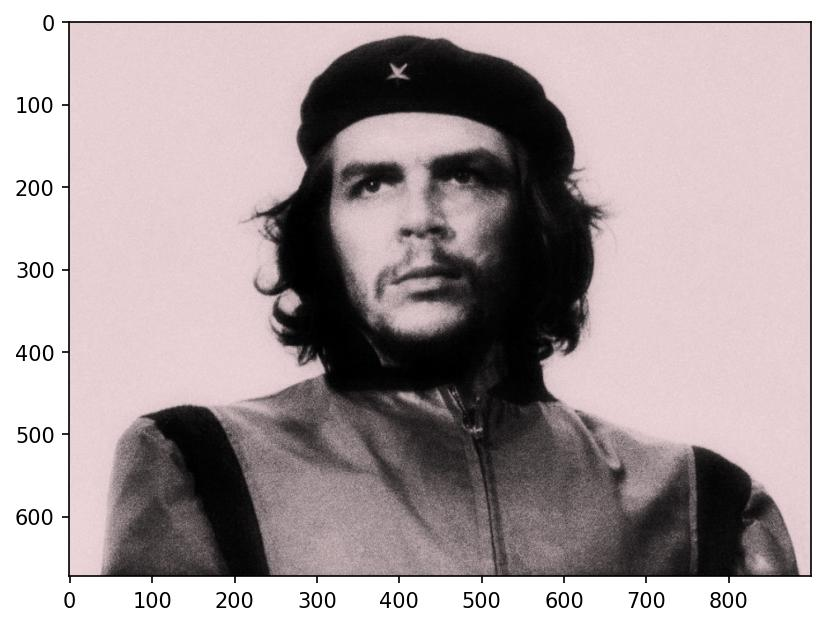

In [7]:
hsv_pink = hsv(350., 25., 100.)

vche = Image.merge('HSV', (
            Image.fromarray(np.full(che.size[::-1], hsv_pink.H*256/360, np.uint8)),
            Image.fromarray(np.full(che.size[::-1], hsv_pink.S, np.uint8)),
            che
        )).convert('RGB')
rgb_inline(vche)